In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

In [4]:
image = cv2.imread('kitten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 8

Напишите код для усиления резкости изображения. Продемонстрируйте действия фильтров высоких частот (идеального, Баттерворта и Гаусса). 

In [9]:
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    return fshift

In [10]:
def inverse_fourier_transform(filtered):
    f_ishift = np.fft.ifftshift(filtered)
    image = np.fft.ifft2(f_ishift)
    return image

In [11]:
def ideal_high_pass_filter_for_channel(channel, d):
    count_rows = channel.shape[0]
    count_columns = channel.shape[1]
    center_row = int(count_rows / 2)
    center_column = int(count_columns / 2)
    mask = np.zeros((count_rows, count_columns), dtype=np.float32)
    for row in range(count_rows):
        for column in range(count_columns):
            distance = np.sqrt(np.square(row - center_row) + np.square(column - center_column))
            if distance > d:
                mask[row, column] = 1
    result = inverse_fourier_transform(fourier_transform(channel) * mask)
    return np.abs(result)

def ideal_high_pass_filter(image, d):
    r_filter = ideal_high_pass_filter_for_channel(image[:, :, 0], d)
    g_filter = ideal_high_pass_filter_for_channel(image[:, :, 1], d)
    b_filter = ideal_high_pass_filter_for_channel(image[:, :, 2], d)
    result = cv2.merge((r_filter, g_filter, b_filter))
    result = result + image
    return np.clip(result, 0, 255).astype(np.uint8)

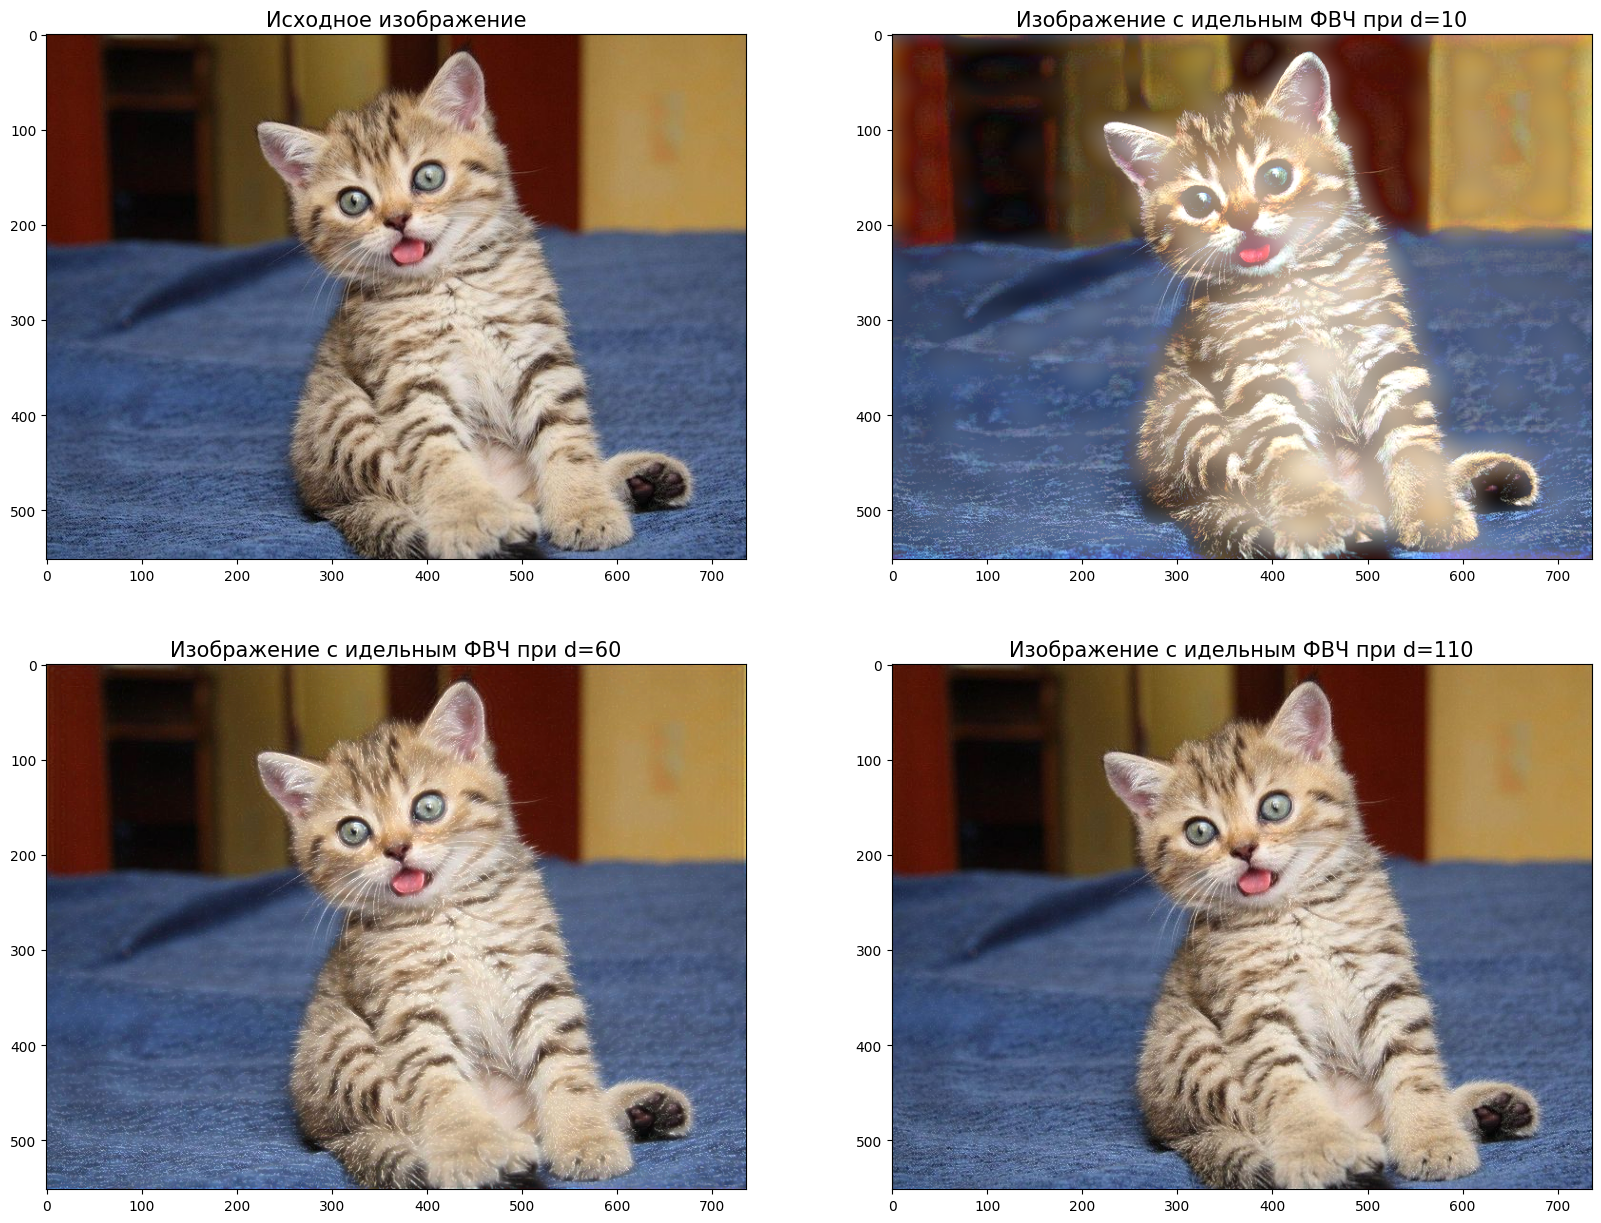

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(222), plt.imshow(ideal_high_pass_filter(image, d=10)), plt.title('Изображение с идельным ФВЧ при d=10', fontsize=15)
plt.subplot(223), plt.imshow(ideal_high_pass_filter(image, d=60)), plt.title('Изображение с идельным ФВЧ при d=60', fontsize=15)
plt.subplot(224), plt.imshow(ideal_high_pass_filter(image, d=160)), plt.title('Изображение с идельным ФВЧ при d=110', fontsize=15)
plt.show()

In [13]:
def butterworth_high_pass_filter_for_channel(channel, d, n):
    count_rows = channel.shape[0]
    count_columns = channel.shape[1]
    center_row = int(count_rows / 2)
    center_column = int(count_columns / 2)
    mask = np.zeros((count_rows, count_columns), dtype=np.float32)
    for row in range(count_rows):
        for column in range(count_columns):
            distance = np.sqrt(np.square(row - center_row) + np.square(column - center_column))
            if distance == 0:
                mask[row, column] = 0
            else:
                mask[row, column] = (1 / (1 + np.power((d / distance), (2 * n))))
    result = inverse_fourier_transform(fourier_transform(channel) * mask)
    return np.abs(result)

def butterworth_high_pass_filter(image, d, n):
    r_filter = butterworth_high_pass_filter_for_channel(image[:, :, 0], d, n) 
    g_filter = butterworth_high_pass_filter_for_channel(image[:, :, 1], d, n)
    b_filter = butterworth_high_pass_filter_for_channel(image[:, :, 2], d, n)
    result = cv2.merge((r_filter, g_filter, b_filter))
    result = result + image
    return np.clip(result, 0, 255).astype(np.uint8)

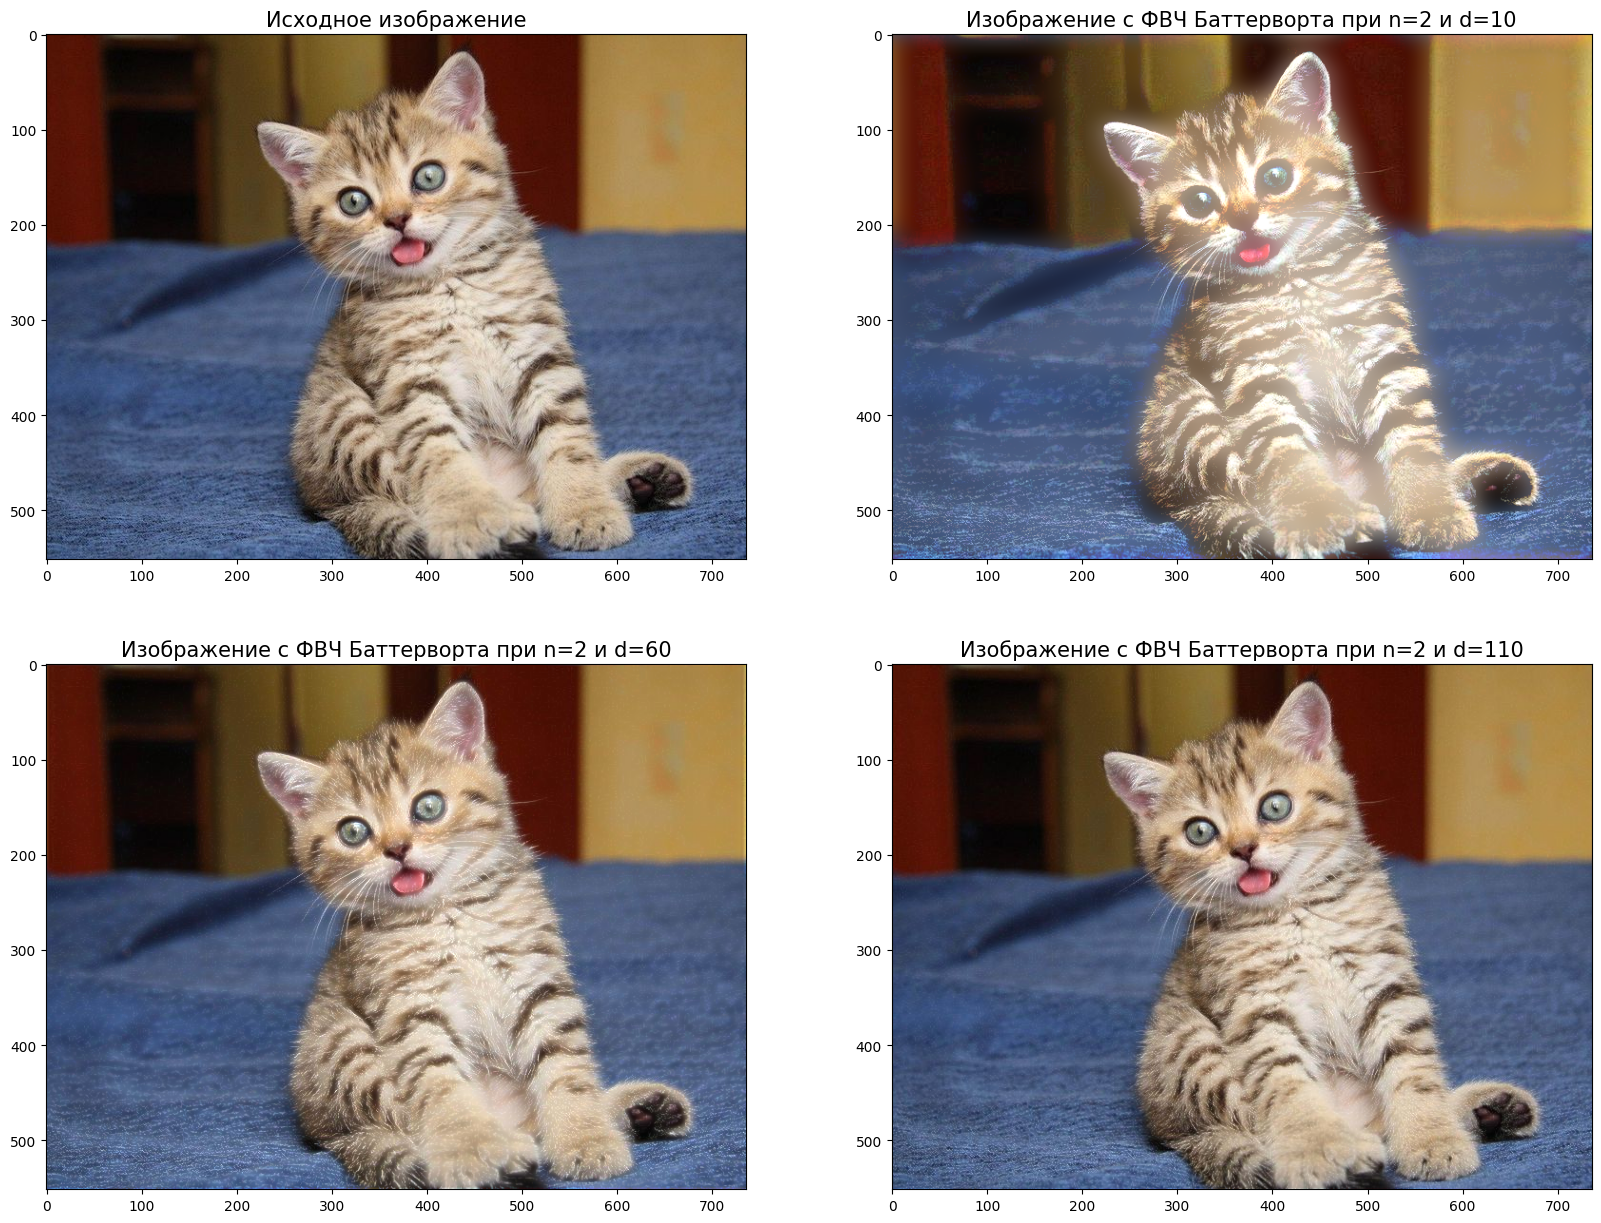

In [14]:
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(222), plt.imshow(butterworth_high_pass_filter(image, d=10, n=2)), plt.title('Изображение с ФВЧ Баттерворта при n=2 и d=10', fontsize=15)
plt.subplot(223), plt.imshow(butterworth_high_pass_filter(image, d=60, n=2)), plt.title('Изображение с ФВЧ Баттерворта при n=2 и d=60', fontsize=15)
plt.subplot(224), plt.imshow(butterworth_high_pass_filter(image, d=160, n=2)), plt.title('Изображение с ФВЧ Баттерворта при n=2 и d=110', fontsize=15)
plt.show()

In [15]:
def gaussian_high_pass_filter_for_channel(channel, d):
    count_rows = channel.shape[0]
    count_columns = channel.shape[1]
    center_row = int(count_rows / 2)
    center_column = int(count_columns / 2)
    mask = np.zeros((count_rows, count_columns), dtype=np.float32)
    for row in range(count_rows):
        for column in range(count_columns):
            distance = np.sqrt(np.square(row - center_row) + np.square(column - center_column))
            mask[row, column] = 1 - np.exp(-(np.square(distance) / (2 * np.square(d))))
    result = inverse_fourier_transform(fourier_transform(channel) * mask)
    return np.abs(result)

def gaussian_high_pass_filter(image, d):
    r_filter = gaussian_high_pass_filter_for_channel(image[:, :, 0], d)
    g_filter = gaussian_high_pass_filter_for_channel(image[:, :, 1], d)
    b_filter = gaussian_high_pass_filter_for_channel(image[:, :, 2], d)
    result = cv2.merge((r_filter, g_filter, b_filter))
    result = result + image
    return np.clip(result, 0, 255).astype(np.uint8)

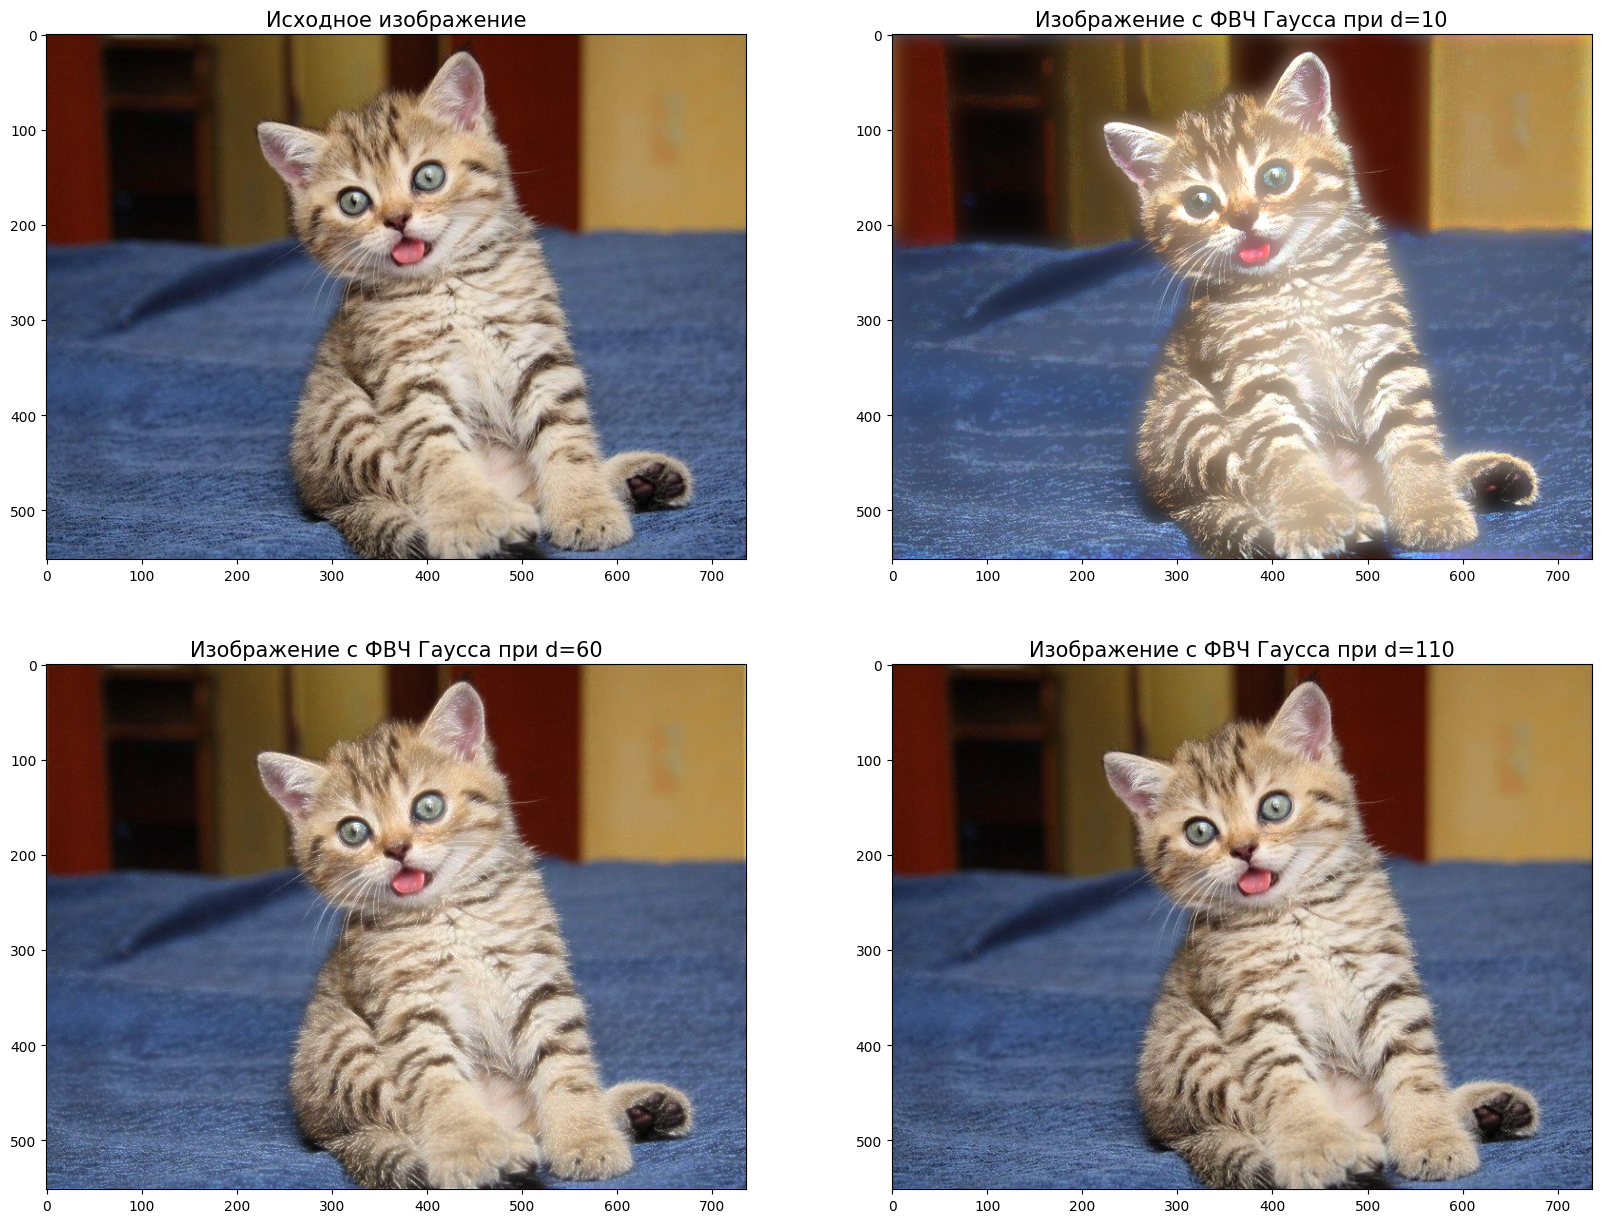

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(222), plt.imshow(gaussian_high_pass_filter(image, d=10)), plt.title('Изображение с ФВЧ Гаусса при d=10', fontsize=15)
plt.subplot(223), plt.imshow(gaussian_high_pass_filter(image, d=60)), plt.title('Изображение с ФВЧ Гаусса при d=60', fontsize=15)
plt.subplot(224), plt.imshow(gaussian_high_pass_filter(image, d=160)), plt.title('Изображение с ФВЧ Гаусса при d=110', fontsize=15)
plt.show()